<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas *2*: *Clustering***

###**Tenggat Waktu: 12 Oktober 2021, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama.ipynb**. Contoh: F_Tugas2_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **12 Oktober 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [10]:
# Isi dengan data diri Anda
NAMA = "Yusuf Fakhri Aldrian"
KELAS = "B"
NPM = "1906351096"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = ["1906308500", "1906353776"]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["https://cstheory.stackexchange.com/questions/17693/hyperspherical-nature-of-k-means-and-similar-clustering-methods",
             "https://www.quora.com/Why-is-that-K-means-algorithm-not-suitable-for-classifying-elongated-data-set",
             "https://statsandr.com/blog/clustering-analysis-k-means-and-hierarchical-clustering-by-hand-and-in-r/",
             "https://www.researchgate.net/figure/Example-of-inter-class-and-intra-class-cluster-similarity-In-this-paper-we-emphasis-only_fig1_280627665",
             "https://edupro.id/questions/254261/apa-yang-dimaksud-dengan-istilah-random-state-pada-fungsi-kmeans-dalam-paket-sklearncluster-dengan-python",
             "https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60",]

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya,  dari kelas  dengan NPM , menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   ()


# Setup: Import Library



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
from scipy.linalg import eigh
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering

## Soal Tugas 2
**Catatan**: Algoritma clustering yang boleh dipakai pada tugas ini hanya K-means dan Agglomerative.

### Soal 1 [15 Poin] - Teori



#### a. Jelaskan mengapa K-means clustering tidak cocok untuk yang bukan hyper-spheres?

Algoritma K-means bekerja sedemikian rupa sehingga setiap kali dua titik data yang berbeda memiliki jarak Euclidean yang substansial satu sama lain (meskipun mereka adalah bagian dari kumpulan data yang sama), ia menempatkan mereka ke dalam dua cluster yang berbeda setelah dipartisi. Untuk kumpulan data yang memanjang, meskipun dua titik data berjauhan satu sama lain, mereka dapat menjadi bagian dari kumpulan data yang sama. Jadi K-means tidak bekerja dengan benar untuk itu. K-means cocok untuk diterapkan hanya pada kumpulan data berbentuk bola di mana, pasca-partisi, semua titik data dalam sebuah cluster akan tetap berada pada jarak dekat dari cluster-centroid (dan pada jarak jauh dari cluster lain di sekitarnya).

#### b. Jelaskan mengapa algoritma Hierarchical clustering dapat digunakan tanpa perlu menetapkan jumlah cluster?
Hierarchical bekerja dengen mengcluster antar titik yang berdekatan, biasanya menggunakan euclidean, dimana clusternya itu tidak bergantung ke pusat. Tidak perlu di-declare pusat cluster n secara otomatis serta mendeklarasikan jumlah cluster.

#### c. Jelaskan apa itu nilai metrik intra-class similarity dan cara menghitungnya!
Intra-class similarity menunjukkan jarak antara suatu data point di
satu cluster dengan data point cluster lain.

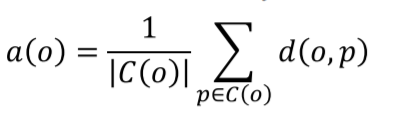


Ilustrasi

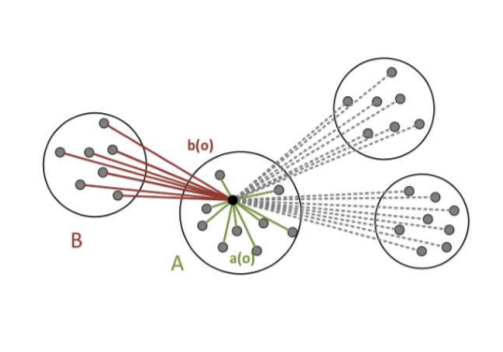

#### d. Jelaskan apa itu nilai metrik inter-class similarity dan cara menghitungnya!
Inter-class similarity menunjukkan jarak antara suatu data point dengan pusat cluster di dalam satu cluster.

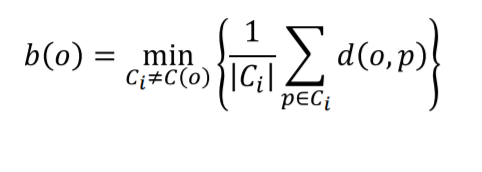

### Soal 2 [40 Poin] - Guess the clustering





#### a. Buka data dari soal2.csv dan plot semua titik di plot dua dimensi!

,x1,x2
0,9.063209,-2.528833
1,-3.896203,1.464862
2,-1.979298,-7.873692
3,-5.437357,2.759334
4,2.052434,-9.600788


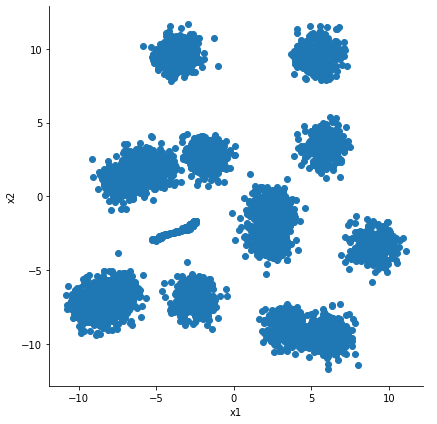

In [5]:
soal2 = pd.read_csv('soal2.csv')
display(soal2.head())

sns.FacetGrid(soal2, height=6).map(plt.scatter, 'x1', 'x2').add_legend()

#### b. Dari plot tersebut, usulkan jumlah klaster yang dapat membagi data dengan baik!

Jumlah klaster adalah **11**.



####c. Gunakan sebuah algoritma clustering yang dapat membagi data sesuai dengan jumlah klasteryang Anda usulkan. Jelaskan mengapa algoritma clustering tersebut digunakan!
**Catatan**: Jawaban seperti karena “K-Means bisa/baik dipakai untuk clustering” tidak cukup.
Semua algoritma clustering bisa dipakai untuk clustering. Tapi kenapa itu?



K-means digunakan.
Terlihat data-data yang bisa dipartisi dimana data-data yang telah dipartisi tersebut memiliki jarak Euclidean yang substansial satu sama lain (antar cluster) dimana masing-masing klaster memiliki jarak yang relatif dekat dengan centroid masing-masing klaster (lebih dekat dibanding jarak ke klaster lain)

Kumpulan data ini sebaiknya tidak dijadikan klaster tersendiri karena bentuknya memanjang (tidak hyperspheroid) - dijadikan bagian dari klaster lainnya.



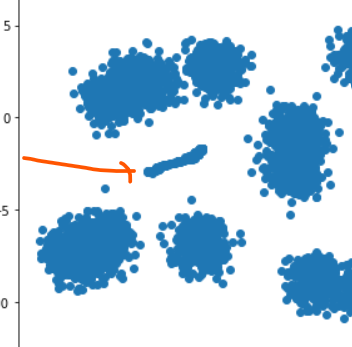

#### d. Visualisasikan hasil clustering dengan menampilkan scatter plot data yang di color-codedberdasarkan klasternya. Selain itu, cetak jumlah cluster yang dihasilkan!
**Hint**: Pelajari parameter c pada fungsi matplotlib.pyplot.scatter()



array([6, 4, 9, ..., 9, 9, 9], dtype=int32)

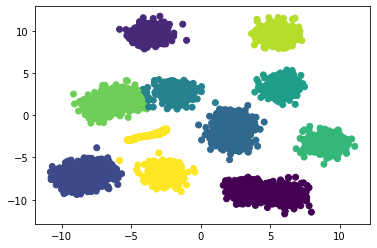

In [7]:
data2 = KMeans(n_clusters=10, random_state=90).fit(soal2)
display(data2.labels_)
plt.scatter(soal2['x1'],soal2['x2'], c = data2.labels_.astype(float))

#### e. Hitung nilai intra-class similarity hasil clustering tersebut dengan menghitung jumlah darijarak (sum of distance) masing-masing sampel dengan pusat klasternya! Koordinat sebuah pusat klaster adalah rata-rata dari semua sampel di klaster tersebut. Rumus jarak yang digunakan adalah L2-norm/Euclidean Distance.



In [8]:
display(data2.inertia_)

11251.433044851512

#### f. Hitung nilai silhouette coefficient dari hasil clustering tersebut!

In [11]:
# Ingatlah bahwa fungsi KMeans adalah stokastik (hasilnya dapat bervariasi bahkan jika Anda menjalankan fungsi dengan nilai input yang sama). 
# Oleh karena itu, agar hasil dapat direproduksi, Anda dapat menentukan nilai untuk parameter random_state.
data2_sc = KMeans(n_clusters=10, random_state=90).fit_predict(soal2)
display(silhouette_score(np.array(soal2), data2_sc))

0.6929151530144653

### Soal 3 [30 Poin] - Hierarchical Clustering



#### a. Buka data dari soal3.csv dan plot semua titik di plot dua dimensi

,x,y
0,-25.0,-50.0
1,-24.5,-59.9
2,-24.0,-69.6
3,-23.5,-79.1
4,-23.0,-88.4


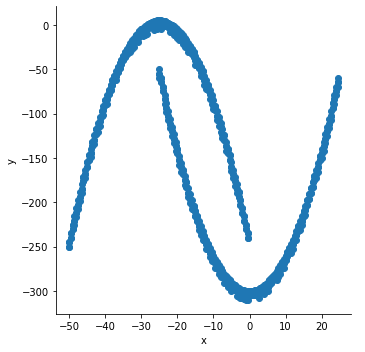

In [13]:
soal3 = pd.read_csv('soal3.csv')
display(soal3.head())

sns.FacetGrid(soal3, height=5).map(plt.scatter, 'x', 'y').add_legend()

#### b. Pada soal ini, anda diharapkan melakukan clustering menggunakan algoritma Agglomerative sehingga terbuat klaster seperti berikut:

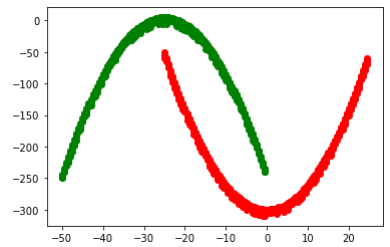

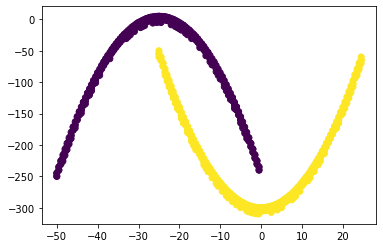

In [15]:
soal3_clustered = AgglomerativeClustering(linkage = "single").fit(soal3)
plt.scatter(soal3['x'],soal3['y'], c = soal3_clustered.labels_.astype(float))

#### c. Kemungkinan besar saat Anda menggunakan modul algoritma Agglomerative dari library sklearn, Anda harus mengubah parameter yang digunakan. Sebutkan parameter apa saja yang anda gunakan beserta nilainya, dan jelaskan alasan anda menggunakan parameter tersebut dan menggunakan nilai tersebut.



```
(linkage = "single")
```
Linkage single ini digunakan untuk mencari jarak minimum antar titik.


#### d. (Bonus) Lakukan clustering menggunakan K-Means pada data tersebut, visualisasikan hasilnya, kemudian lakukan analisis terhadap hasil tersebut.

### Soal 4 [20 Poin] - Which came first: dimensionality reduction or clustering?





#### a. Buka data dari soal4.csv dan tampilkan 10 baris pertama! Hitung jumlah data dan jumlah fitur!

In [18]:
soal4 = pd.read_csv('soal4.csv')
print('Jumlah data:', soal4.shape[0])
print("Jumlah fitur:", soal4.shape[1])
display(soal4.head(10))

Jumlah data: 1000
Jumlah fitur: 3


,A,B,E
0,0.470839,-0.978228,-4.981786
1,-0.079349,-0.798295,-5.173138
2,0.698990,-1.925331,-5.955414
3,1.246046,-0.125634,-6.029880
4,0.570842,-0.672183,-4.181259
5,0.325580,-1.389908,-2.461709
6,0.721706,-0.615033,-5.444958
7,0.793625,-0.781055,-5.084923
8,0.576666,0.001895,-6.165497
9,0.907629,-0.650638,-6.290293


#### b. Ikuti langkah-langkah berikut:


##### i. Salin data asli dan masukkan dalam variable data_copy_1!

In [20]:
data_copy_1 = soal4.copy()
X = data_copy_1
X_std = StandardScaler().fit_transform(X)

##### ii. Lakukan Dimensionality reduction (PCA) pada data_copy_1 sehingga jumlah fiturnya menjadi 2!

In [21]:
pca = PCA(n_components=2)
skl_pca = pca.fit_transform(X_std)
skl_pca.shape
skl_pca = np.vstack((skl_pca.T)).T
df4_reduced = pd.DataFrame(data=skl_pca, columns=("fitur1", "fitur2"))

##### iii. Visualisasikan data_copy_1 yang sudah direduksi, kemudian tentukan berapa jumlah cluster yang tepat!



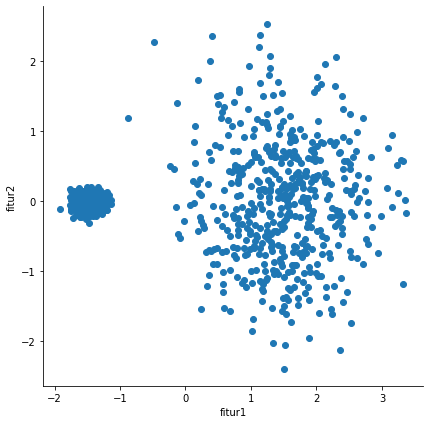

In [24]:
sns.FacetGrid(df4_reduced, height=6).map(plt.scatter, "fitur1", "fitur2").add_legend()
plt.show()

##### iv. Lakukan clustering pada data_copy_1 yang sudah direduksi menggunakan K-Means dengan parameter random_state=2021!



In [30]:
soal4_iv = KMeans(n_clusters=2, random_state=2021).fit(df4_reduced)
display(soal4_iv.labels_)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##### v. Visualisasikan hasil clustering pada data_copy_1 yang sudah direduksi!



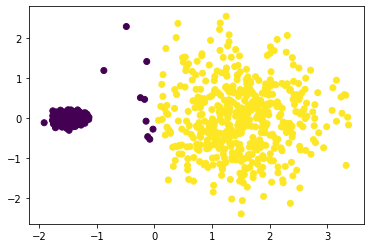

In [32]:
plt.scatter(df4_reduced['fitur1'],df4_reduced['fitur2'], c = soal4_iv.labels_.astype(float))

#### c. Ikuti langkah-langkah berikut:



##### i. Salin data asli dan masukkan dalam variable data_copy_2!


In [33]:
data_copy_2 = soal4.copy()

##### ii. Lakukan clustering pada data_copy_2 menggunakan K-Means dengan parameter random_state=2021 dan jumlah cluster sama dengan jumlah cluster yang kamu gunakan pada poin b!


In [34]:
soal4c = KMeans(n_clusters=2, random_state=2021).fit(data_copy_2)

##### iii. Lakukan Dimensionality reduction (PCA) pada data_copy_2 sehingga jumlah fiturnya menjadi 2!


In [35]:
pca = PCA(n_components=2)
skl_pca = pca.fit_transform(data_copy_2)
skl_pca.shape
skl_pca = np.vstack((skl_pca.T)).T
df4c_reduced = pd.DataFrame(data=skl_pca, columns=("fitur1", "fitur2"))

##### iv. Visualisasikan hasil clustering pada data_copy_2 yang sudah direduksi!


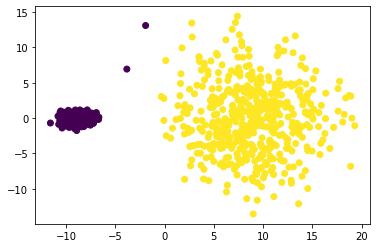

In [36]:
plt.scatter(df4c_reduced['fitur1'],df4c_reduced['fitur2'], c = soal4c.labels_.astype(float))

#### d. Apakah ada perbedaan pada hasil poin b dan poin c? Mengapa demikian? Apa kesimpulan yang bisa anda ambil?

Pada poin b, PCA dilakukan sebelum clustering. Sehingga hasil cluster yang didapatkan adalah berdasarkan hasil PCA. 

Pada poin c, clustering dilakukan sebelum PCA. Klaster yang dihasilkan terdapat pada dimensi ke-3 sehingga menggunakan metrik terhadap jarak tiga dimensi. Sedangkan setelah dilakukan PCA, data menjadi 2 dimensi sehingga data dan klaster menjadi berbeda dan tidak sesuai dengan yang dilihat.